<details><summary style="display:list-item; font-size:16px; color:blue;">Jupyter Help</summary>
    
Having trouble testing your work? Double-check that you have followed the steps below to write, run, save, and test your code!
    `
[Click here for a walkthrough GIF of the steps below](https://static-assets.codecademy.com/Courses/ds-python/jupyter-help.gif)

Run all initial cells to import libraries and datasets. Then follow these steps for each question:
    
1. Add your solution to the cell with `## YOUR SOLUTION HERE ## `.
2. Run the cell by selecting the `Run` button or the `Shift`+`Enter` keys.
3. Save your work by selecting the `Save` button, the `command`+`s` keys (Mac), or `control`+`s` keys (Windows).
4. Select the `Test Work` button at the bottom left to test your work.

![Screenshot of the buttons at the top of a Jupyter Notebook. The Run and Save buttons are highlighted](https://static-assets.codecademy.com/Paths/ds-python/jupyter-buttons.png)

**Setup**

Run the following cell to import NumPy, pandas, and PyTorch.

In [2]:
import numpy as np
import pandas as pd

import torch
import torch.nn as nn
import torch.optim as optim

**Import Data**

Run the code cell to import the dataset and select numerical features. In this exercise, we'll start using a larger set of numerical features:

- **bedrooms**: The number of bedrooms in the apartment
- **bathrooms**: The number of bathrooms in the apartment
- **size_sqft**: The size of the apartment in square feet  
- **min_to_subway**: The number of minutes to the closest subway
- **floor**: The building floor of the apartment
- **building_age_yrs**: The age of the building in years
- **no_fee**: Binary indicator that specifies whether the rental has a broker's fee (1) or not (0)
- **has_roofdeck**: Binary indicator that specifies whether the rental has a roofdeck (1) or not (0)
- **has_washer_dryer**: Binary indicator that specifies whether the rental has a washer/dryer units (1) or not (0)
- **has_doorman**: Binary indicator that specifies whether the rental has a doorman (1) or not (0)
- **has_elevator**: Binary indicator that specifies whether the rental has an elevator (1) or not (0)
- **has_dishwasher**: Binary indicator that specifies whether the rental has a dishwasher (1) or not (0)
- **has_patio**: Binary indicator that specifies whether the rental has a patio (1) or not (0)
- **has_gym**: Binary indicator that specifies whether the rental has a gym (1) or not (0)
 boroughs




In [3]:
apartments_df = pd.read_csv("streeteasy.csv")

numerical_features = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs',
                      'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher',
                      'has_patio', 'has_gym']

# create tensor of input features
X = torch.tensor(apartments_df[numerical_features].values, dtype=torch.float)
# create tensor of targets
y = torch.tensor(apartments_df['rent'].values, dtype=torch.float).view(-1,1)

**Checkpoint 1/4**

In the Import Data cell, we created two tensors:
- `X` contains our numeric input features
- `y` contains the corresponding target rent values

Use `scikit-learn` to split these into training and testing datasets.

The training dataset (`X_train` and `y_train`) should have 70% of the data.

The testing dataset (`X_test` and `y_test`) should have 30% of the data.

Use a random state of `2`.

Don’t forget to run and save the cell before selecting `Test Work`! Open the `Jupyter Help` toggle at the top of the notebook for more details.

In [4]:
## YOUR SOLUTION HERE ##
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)


**Checkpoint 2/4**

We've already defined a neural network and training loop. But we forgot to only train on our training dataset! Can you fix the code so that the neural network is only seeing the training data during the training process?

Don’t forget to run and save the cell before selecting `Test Work`! Open the `Jupyter Help` toggle at the top of the notebook for more details.

In [5]:
# set a random seed - do not modify
torch.manual_seed(42)

# Define the model using nn.Sequential
model = nn.Sequential(
    nn.Linear(14, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 1)
)

# MSE loss function + optimizer
loss = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## YOUR SOLUTION HERE ##
num_epochs = 1000
for epoch in range(num_epochs):
    predictions = model(X_train) 
    MSE = loss(predictions, y_train) 
    MSE.backward()
    optimizer.step() 
    optimizer.zero_grad()
    
    ## DO NOT MODIFY ##
    # keep track of the loss during training
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], MSE Loss: {MSE.item()}')

Epoch [100/1000], MSE Loss: 3144756.75
Epoch [200/1000], MSE Loss: 3030343.5
Epoch [300/1000], MSE Loss: 2950239.0
Epoch [400/1000], MSE Loss: 2880079.0
Epoch [500/1000], MSE Loss: 2820468.25
Epoch [600/1000], MSE Loss: 2771156.5
Epoch [700/1000], MSE Loss: 2730910.0
Epoch [800/1000], MSE Loss: 2697787.75
Epoch [900/1000], MSE Loss: 2671344.25
Epoch [1000/1000], MSE Loss: 2648587.5


**Checkpoint 3/4**

Save the model from Checkpoint 2 to the file `model.pth`.

Don’t forget to run and save the cell before selecting `Test Work`! Open the `Jupyter Help` toggle at the top of the notebook for more details.

In [6]:
## YOUR SOLUTION HERE ##
torch.save(model, 'model.pth')

**Checkpoint 4/4**

We've saved a model trained for `20,000` epochs in the path `model20k.pth`.

Load this model to the variable `loaded_model`, and evaluate its performance on the test dataset.

Within the evaluation, save the MSE of the test predictions to the variable `test_MSE`.

Don’t forget to run and save the cell before selecting `Test Work`! Open the `Jupyter Help` toggle at the top of the notebook for more details.

In [7]:
## YOUR SOLUTIONS HERE ##
loaded_model = torch.load('model20k.pth')

loaded_model.eval()
with torch.no_grad():
    predictions = loaded_model(X_test)
    test_MSE = loss(predictions, y_test)


# show output
print('Test MSE is ' + str(test_MSE.item()))
print('Test Root MSE is ' + str(test_MSE.item()**(1/2)))

Test MSE is 1997976.875
Test Root MSE is 1413.4980986899134


On average, our model still has error probably larger than we'd want. But for a quite small neural network without any tuning, this is pretty good!

**Visualization**

Run the cell below to plot our model's predictions against the actual targets, for the test dataset. If our model was perfect, all the dots would be on the dashed line. How do you think we've done?

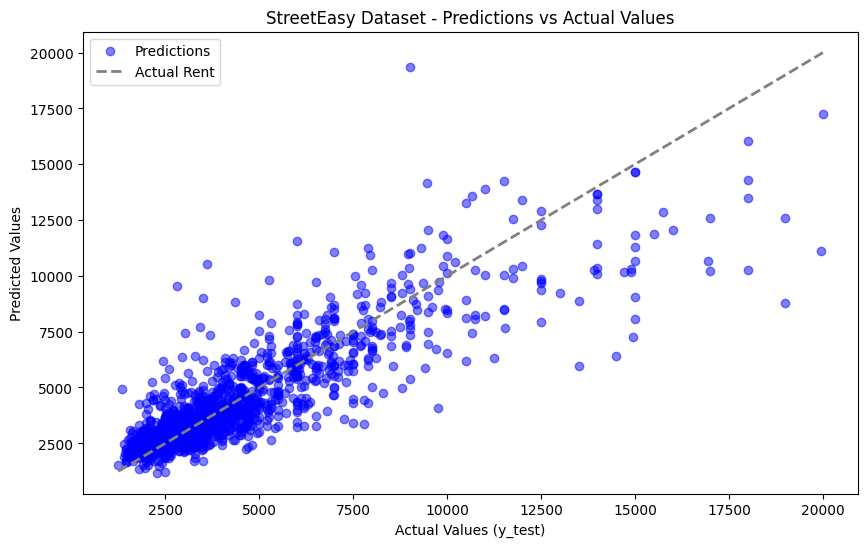

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, label='Predictions', alpha=0.5, color='blue')

plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', linewidth=2,
         label="Actual Rent")
plt.legend()
plt.title('StreetEasy Dataset - Predictions vs Actual Values')
plt.show()

We're definitely moving in the right direction!